In [ ]:
import pandas as pd
import numpy as np
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

In [ ]:
data_houses = pd.read_csv('/content/California_Houses.csv')

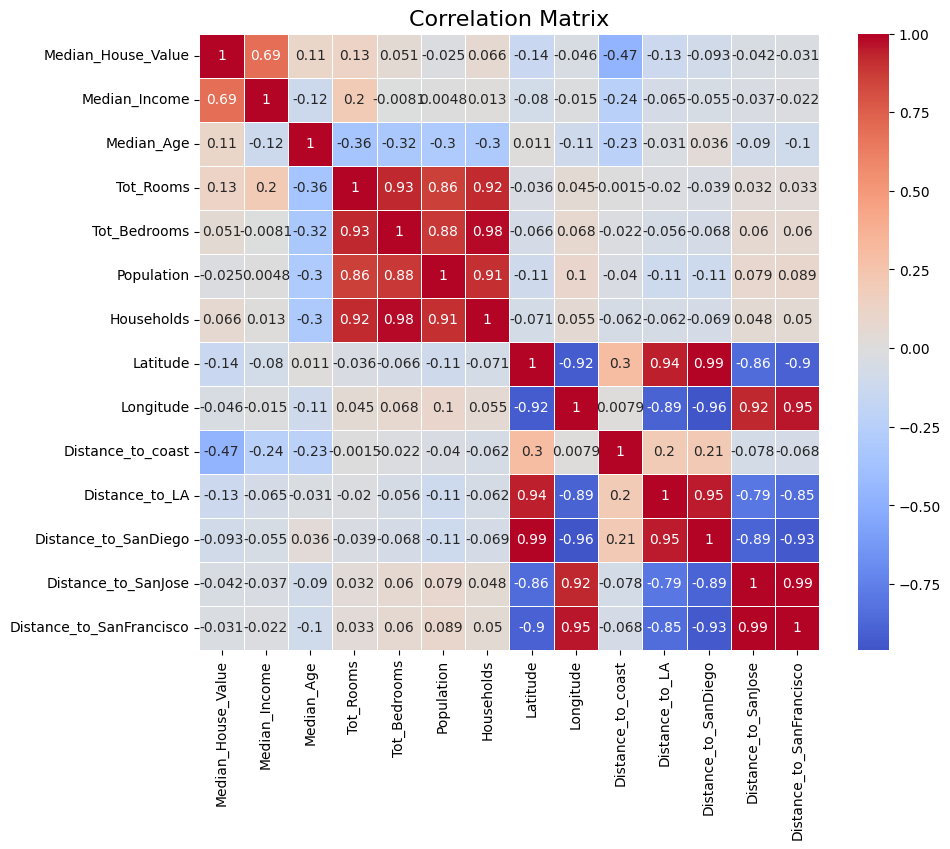

In [ ]:
df_houses = pd.DataFrame(data_houses)

correlation_matrix_houses = df_houses.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_houses,
            annot=True,
            cmap="coolwarm",
            center=0,
            linewidths=0.5)
plt.title("Correlation Matrix", fontsize=16)
plt.show()

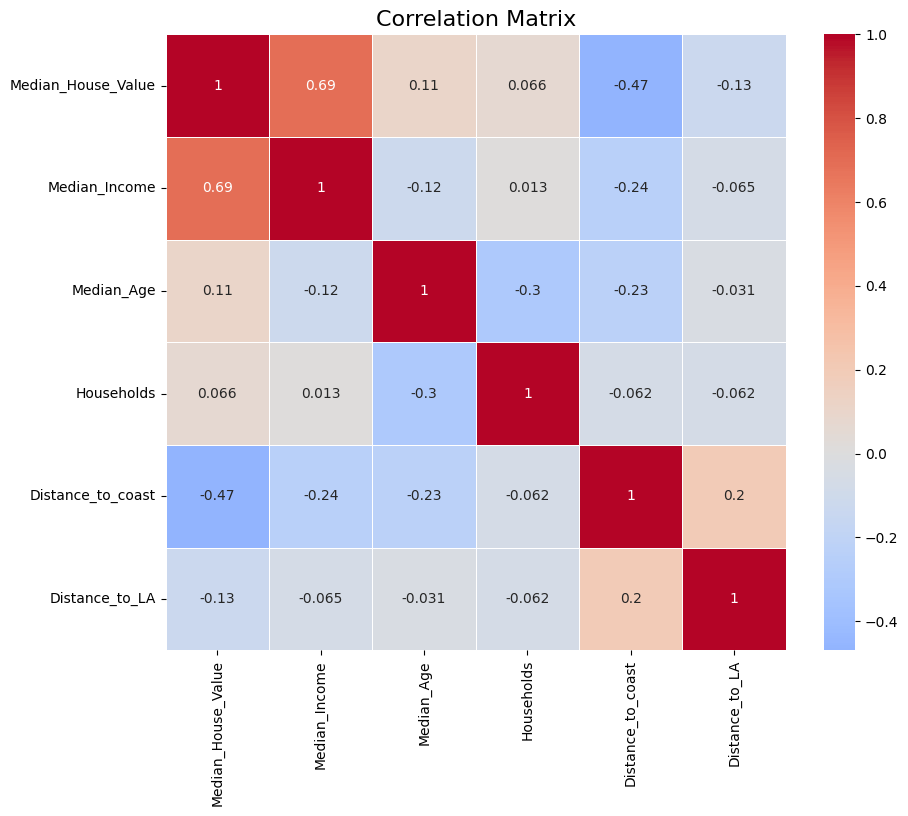

In [ ]:
df_houses_filted = df_houses.drop(columns=['Tot_Bedrooms', 'Tot_Rooms', 'Population', 'Longitude', 'Latitude', 'Distance_to_SanDiego', 'Distance_to_SanJose', 'Distance_to_SanFrancisco'])

correlation_matrix_houses_fillted = df_houses_filted.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_houses_fillted,
            annot=True,       # подписи значений
            cmap="coolwarm",  # цветовая схема (можно 'viridis', 'plasma' и др.)
            center=0,         # центрируем по нулю
            linewidths=0.5)   # разделительные линии
plt.title("Correlation Matrix", fontsize=16)
plt.show()

In [ ]:
X = df_houses_filted.drop(columns='Median_House_Value')
y = df_houses['Median_House_Value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
class LinearRegressionMatrix:
    def __init__(self, lr=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

        self.history_mse = []
        self.history_mae = []
        self.history_r2 = []

    def fit(self, X, y):
        X = np.array(X, dtype=float)
        y = np.array(y, dtype=float).reshape(-1)

        n_samples, n_features = X.shape

        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
          y_pred = np.dot(X, self.weights) + self.bias

          error = y_pred - y

          dw = (2 / n_samples) * np.dot(X.T, error)
          db = (2 / n_samples) * np.sum(error)

          self.weights -= self.lr * dw
          self.bias -= self.lr * db

          mse = np.mean(error**2)
          mae = np.mean(np.abs(error))
          r2 = 1 - np.sum(error**2) / np.sum((y - np.mean(y))**2)

          self.history_mse.append(mse)
          self.history_mae.append(mae)
          self.history_r2.append(r2)

    def predict(self, X):
        X = np.array(X, dtype=float)
        return np.dot(X, self.weights) + self.bias

In [ ]:
X_mean, X_std = np.mean(X_train, axis=0), np.std(X_train, axis=0)
X_std[X_std == 0] = 1
X_train_scaled = (X_train - X_mean) / X_std
X_test_scaled = (X_test - X_mean) / X_std

In [ ]:
model = LinearRegressionMatrix(lr=0.1, n_iters=1000)
model.fit(X_train_scaled, y_train)
model.predict(X_test_scaled)

array([ 22827.49514009, 133619.54014623, 255885.09250466, ...,
       422990.96753635,  83802.84307177, 190409.41170561])

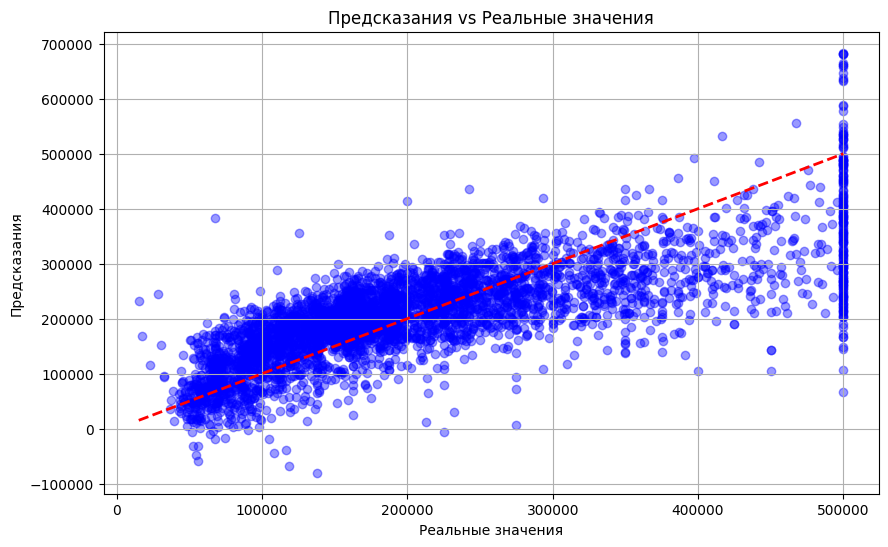

In [ ]:
y_pred = model.predict(X_test_scaled)

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Реальные значения')
plt.ylabel('Предсказания')
plt.title('Предсказания vs Реальные значения')
plt.grid(True)
plt.show()

In [ ]:
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R^2: {r2:.4f}")

MSE: 5594562421.6391
RMSE: 74796.8076
R^2: 0.5731


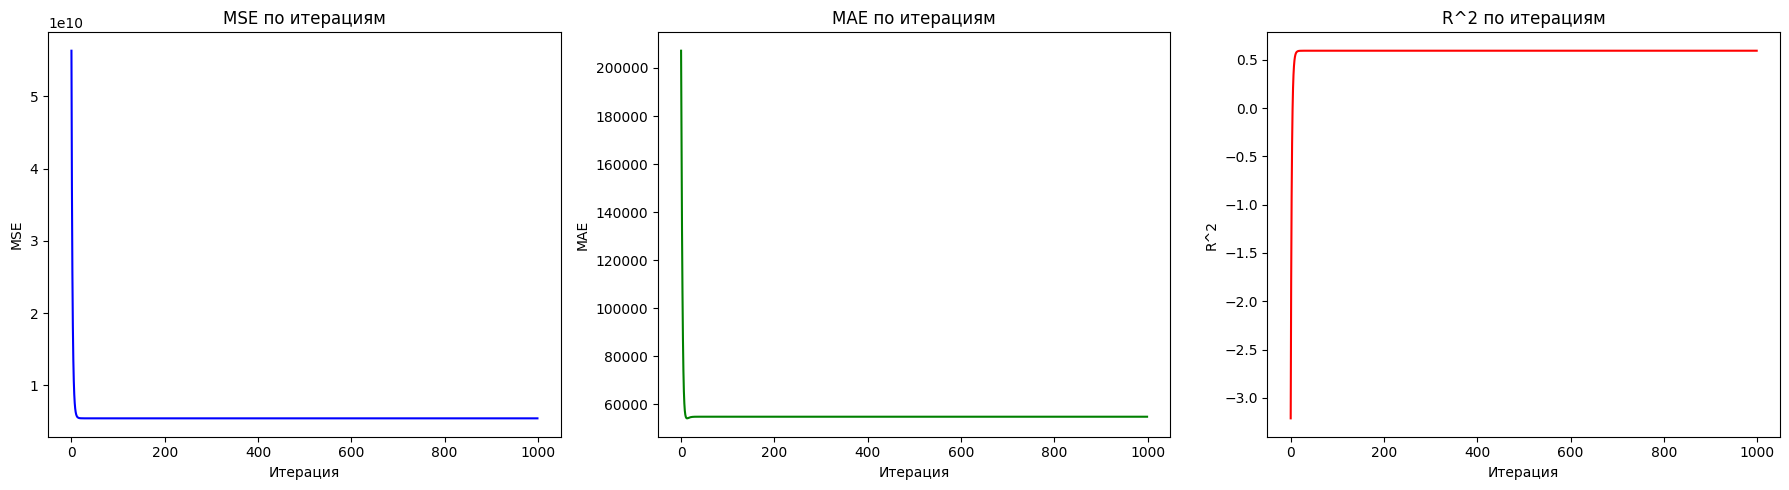

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18,5))

# MSE
plt.subplot(1,3,1)
plt.plot(model.history_mse, color='blue')
plt.title("MSE по итерациям")
plt.xlabel("Итерация")
plt.ylabel("MSE")

# MAE
plt.subplot(1,3,2)
plt.plot(model.history_mae, color='green')
plt.title("MAE по итерациям")
plt.xlabel("Итерация")
plt.ylabel("MAE")

# R^2
plt.subplot(1,3,3)
plt.plot(model.history_r2, color='red')
plt.title("R^2 по итерациям")
plt.xlabel("Итерация")
plt.ylabel("R^2")

plt.tight_layout()
plt.show()


In [ ]:
data_titanic = pd.read_csv('/content/Titanic-Dataset.csv')

In [ ]:
df_titanic = pd.DataFrame(data_titanic).drop(columns=['Name', 'Ticket', 'Cabin'])

df_titanic_encoded = pd.get_dummies(df_titanic, columns=['Sex', 'Embarked'], prefix=['Sex', 'Embarked'], dtype=int)

missing_count = df_titanic_encoded.replace('', np.nan).isna().sum()
df_titanic_encoded.replace('', np.nan, inplace=True)

# Заменяем NaN на среднее значение каждого столбца
df_titanic_mean = df_titanic_encoded.apply(lambda col: col.fillna(col.mean()) if col.dtype in [np.float64, np.int64] else col)
df_titanic_mean



,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.000000,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.000000,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.000000,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.000000,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.000000,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0,1,0,0,1
887,888,1,1,19.000000,0,0,30.0000,1,0,0,0,1
888,889,0,3,29.699118,1,2,23.4500,1,0,0,0,1
889,890,1,1,26.000000,0,0,30.0000,0,1,1,0,0


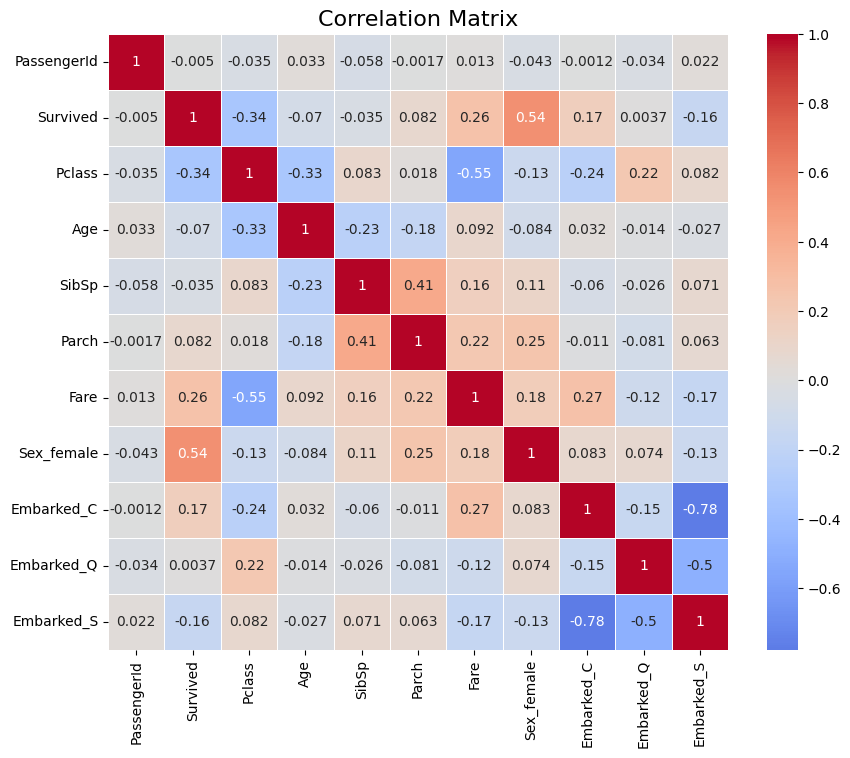

In [ ]:
df_titanic_mean_fillted = df_titanic_mean.drop(columns='Sex_male')

correlation_matrix_titanic = df_titanic_mean_fillted.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_titanic,
            annot=True,       # подписи значений
            cmap="coolwarm",  # цветовая схема (можно 'viridis', 'plasma' и др.)
            center=0,         # центрируем по нулю
            linewidths=0.5)   # разделительные линии
plt.title("Correlation Matrix", fontsize=16)
plt.show()

#идеально с первого раза чудо (почти)

In [ ]:
from sklearn.preprocessing import StandardScaler

X = df_titanic_mean_fillted.drop(columns='Survived')
y = df_titanic_mean_fillted['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_cols = ['PassengerId', 'Age', 'SibSp', 'Parch', 'Fare']

scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score

class LogisticRegressionMatrix:
    def __init__(self, lr=0.01, n_iter=1000):
        self.lr = lr
        self.n_iter = n_iter
        self.weights = None
        self.bias = None

        self.loss_history = []
        self.acc_history = []
        self.f1_history = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        X = np.array(X, dtype=float)
        y = np.array(y, dtype=float).reshape(-1)

        n_samples, n_features = X.shape

        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iter):
            y_pred = self.sigmoid(np.dot(X, self.weights) + self.bias)

            err = y_pred - y

            dw = np.dot(X.T, err) / n_samples
            db = np.sum(err) / n_samples

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            eps = 1e-15
            y_pred_clipped = np.clip(y_pred, eps, 1 - eps)
            loss = -np.mean(y * np.log(y_pred_clipped) + (1 - y) * np.log(1 - y_pred_clipped))
            self.loss_history.append(loss)


            # --- сохраняем метрики --
            preds = (y_pred >= 0.5).astype(int)
            acc = accuracy_score(y, preds)
            f1 = f1_score(y, preds)
            self.acc_history.append(acc)
            self.f1_history.append(f1)


    def predict_proba(self, X):
        return self.sigmoid(np.dot(X, self.weights) + self.bias)

    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X) >= threshold).astype(int)


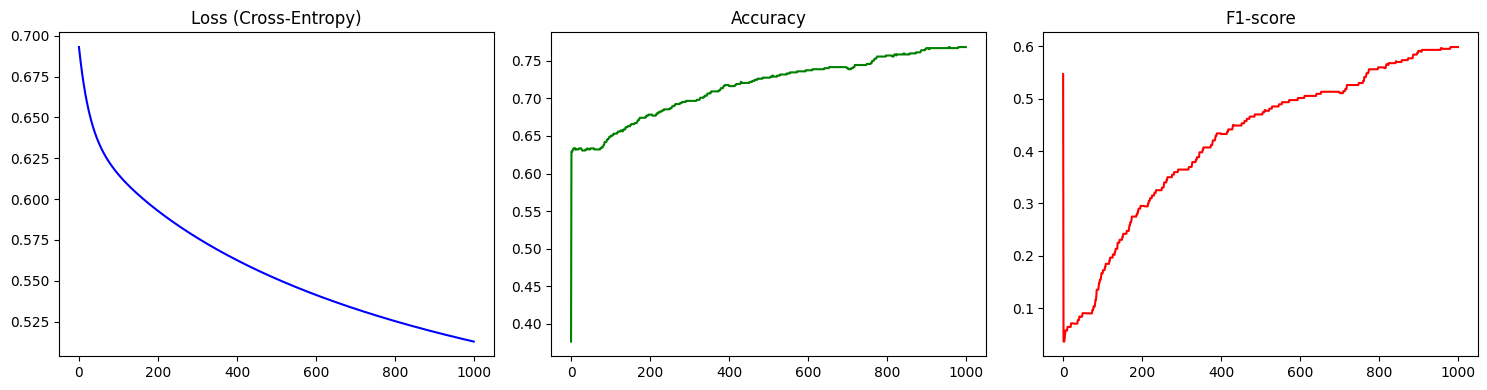

In [ ]:
model = LogisticRegressionMatrix(lr=0.1, n_iter=1000)
model.fit(X_train_scaled, y_train)

plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
plt.plot(model.loss_history, color='blue')
plt.title("Loss (Cross-Entropy)")

plt.subplot(1,3,2)
plt.plot(model.acc_history, color='green')
plt.title("Accuracy")

plt.subplot(1,3,3)
plt.plot(model.f1_history, color='red')
plt.title("F1-score")

plt.tight_layout()
plt.show()
